In [44]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/Users/vikaspandey/projects/deeplearning_ai')
import numpy as np
from algorithms.text.preprocessing import TextPreprocessor
from dsl.datasets.nlp.tweets import get_positive_and_negative_tweets

In [30]:
positive_tweets, negative_tweets = get_positive_and_negative_tweets()

In [31]:
all_tweets = positive_tweets + negative_tweets
labels = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)))

In [32]:
text_preprocessor = TextPreprocessor(all_tweets)

In [33]:
text_preprocessor.build_freqs(labels)

In [34]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

In [35]:
final_values = []
for word in keys:
    if (word, 0) in text_preprocessor.freqs:
        neg = text_preprocessor.freqs[(word, 0)]
    if (word, 1) in text_preprocessor.freqs:
        pos = text_preprocessor.freqs[(word, 1)]
    final_values.append([word, pos, neg])

In [39]:
features = []
sentiments = np.squeeze(labels).tolist()
for sentiment, words in zip(sentiments, text_preprocessor.processed_text):
    positive = 0
    negative = 0
    for word in words:
        positive += text_preprocessor.freqs.get((word, 1), 0)
        negative += text_preprocessor.freqs.get((word, 0), 0)
    features.append({'bias': 1, 'positive': positive, 'negative': negative, 'sentiment': sentiment})

In [40]:
features = pd.DataFrame(features)

In [42]:
X = features[['bias', 'positive', 'negative']].values
Y = features['sentiment'].values

In [43]:
theta = [7e-08, 0.0005239, -0.00055517]

Text(0, 0.5, 'Negative')

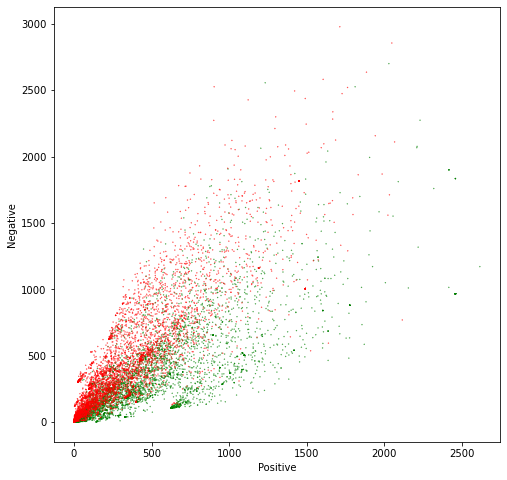

In [45]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

In [46]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

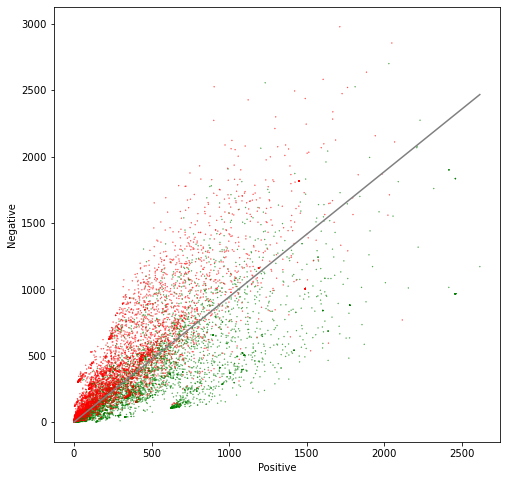

In [47]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()